In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from google.colab import files

import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.feature_extraction import DictVectorizer
from sklearn import tree
from sklearn import ensemble
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import KFold

from sklearn import datasets, linear_model, svm
from sklearn.base import clone

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import label_binarize

uploaded = files.upload()  #uncomment when the csv file needs to be reloaded

prime_contraceptive_set = pd.read_csv("contraceptive_for_students.csv")

sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

prime_contraceptive_set.head(5)

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [ ]:
# one hot encoding funciton
# convert categorical variables form doubles to strings
# one hot encode all categorical variabls

def ohe(data):
  data = data.replace({'wife_education': 1}, {'wife_education': '1'})
  data = data.replace({'wife_education': 2}, {'wife_education': '2'})
  data = data.replace({'wife_education': 3}, {'wife_education': '3'})
  data = data.replace({'wife_education': 4}, {'wife_education': '4'})

  data = data.replace({'husband_education': 1}, {'husband_education': '1'})
  data = data.replace({'husband_education': 2}, {'husband_education': '2'})
  data = data.replace({'husband_education': 3}, {'husband_education': '3'})
  data = data.replace({'husband_education': 4}, {'husband_education': '4'})

  data = data.replace({'wife_religion': 0}, {'wife_religion': '0'})
  data = data.replace({'wife_religion': 1}, {'wife_religion': '1'})

  data = data.replace({'wife_work': 0}, {'wife_work': '0'})
  data = data.replace({'wife_work': 1}, {'wife_work': '1'})

  data = data.replace({'husband_occupation': 1}, {'husband_occupation': '1'})
  data = data.replace({'husband_occupation': 2}, {'husband_occupation': '2'})
  data = data.replace({'husband_occupation': 3}, {'husband_occupation': '3'})
  data = data.replace({'husband_occupation': 4}, {'husband_occupation': '4'})

  data = data.replace({'standard_living': 1}, {'standard_living': '1'})
  data = data.replace({'standard_living': 2}, {'standard_living': '2'})
  data = data.replace({'standard_living': 3}, {'standard_living': '3'})
  data = data.replace({'standard_living': 4}, {'standard_living': '4'})

  data = data.replace({'media_exposure': 0}, {'media_exposure': '0'})
  data = data.replace({'media_exposure': 1}, {'media_exposure': '1'})

  vec_enc1 = DictVectorizer()
  vec_enc1.fit(data[['wife_education']].to_dict(orient='records'))
  wife_edu_data = vec_enc1.transform(data[['wife_education']].to_dict(orient='records')).toarray()
  wife_edu_cats = vec_enc1.get_feature_names()
  wife_edu = pd.DataFrame(wife_edu_data, columns=wife_edu_cats).set_index(data.index)
  data = pd.concat([data, wife_edu], axis=1)

  vec_enc2 = DictVectorizer()
  vec_enc2.fit(data[['husband_education']].to_dict(orient='records'))
  husband_edu_data = vec_enc2.transform(data[['husband_education']].to_dict(orient='records')).toarray()
  husband_edu_cats = vec_enc2.get_feature_names()
  husband_edu = pd.DataFrame(husband_edu_data, columns=husband_edu_cats).set_index(data.index)
  data = pd.concat([data, husband_edu], axis=1)

  vec_enc3 = DictVectorizer()
  vec_enc3.fit(data[['wife_religion']].to_dict(orient='records'))
  relig_data = vec_enc3.transform(data[['wife_religion']].to_dict(orient='records')).toarray()
  relig_cats = vec_enc3.get_feature_names()
  relig = pd.DataFrame(relig_data, columns=relig_cats).set_index(data.index)
  data = pd.concat([data, relig], axis=1)

  vec_enc4 = DictVectorizer()
  vec_enc4.fit(data[['wife_work']].to_dict(orient='records'))
  wife_work_data = vec_enc4.transform(data[['wife_work']].to_dict(orient='records')).toarray()
  wife_work_cats = vec_enc4.get_feature_names()
  wife_work = pd.DataFrame(wife_work_data, columns=wife_work_cats).set_index(data.index)
  data = pd.concat([data, wife_work], axis=1)

  vec_enc5 = DictVectorizer()
  vec_enc5.fit(data[['husband_occupation']].to_dict(orient='records'))
  husband_work_data = vec_enc5.transform(data[['husband_occupation']].to_dict(orient='records')).toarray()
  husband_work_cats = vec_enc5.get_feature_names()
  husband_work = pd.DataFrame(husband_work_data, columns=husband_work_cats).set_index(data.index)
  data = pd.concat([data, husband_work], axis=1)

  vec_enc6 = DictVectorizer()
  vec_enc6.fit(data[['standard_living']].to_dict(orient='records'))
  standard_living_data = vec_enc6.transform(data[['standard_living']].to_dict(orient='records')).toarray()
  standard_living_cats = vec_enc6.get_feature_names()
  standard_living = pd.DataFrame(standard_living_data, columns=standard_living_cats).set_index(data.index)
  data = pd.concat([data, standard_living], axis=1)

  vec_enc7 = DictVectorizer()
  vec_enc7.fit(data[['media_exposure']].to_dict(orient='records'))
  media_data = vec_enc7.transform(data[['media_exposure']].to_dict(orient='records')).toarray()
  media_cats = vec_enc7.get_feature_names()
  media = pd.DataFrame(media_data, columns=media_cats).set_index(data.index)
  data = pd.concat([data, media], axis=1)

  data = data.drop(['wife_education', 'husband_education', 'wife_religion', 'wife_work', 'husband_occupation', 'standard_living', 'media_exposure'], axis=1)

  return data

In [ ]:
one_hot_encoded_contraceptive_data = ohe(prime_contraceptive_set.copy())# this is the original excel file being encoded

training, testing = train_test_split(one_hot_encoded_contraceptive_data, test_size=0.1, random_state=42) 
y_train = training['contraceptive']
y_test = testing['contraceptive']
x_train = training.drop(['contraceptive'], axis = 1)
x_test = testing.drop(['contraceptive'], axis = 1)


contraceptive_array = np.array(training['contraceptive']) #this is basically y_train
training_copy = training.copy()
contra_1_df = training_copy.loc[training_copy['contraceptive'] == 1]
contra_2_df = training_copy.loc[training_copy['contraceptive'] == 2]
contra_3_df = training_copy.loc[training_copy['contraceptive'] == 3]
training_copy
#plt.spy(oh_enc.transform(training_copy[['wife_education', 'husband_education','wife_religion', 'wife_work', 'husband_occupation', 'standard_living',  'media_exposure']]))
#linear_model = LinearRegression()
#linear_model.fit(training_1[['wife_age', 'wife_work', 'wife_education']], y_train)
#linear_model.predict(training_1[['wife_age', 'wife_work', 'wife_education']])

,wife_age,num_child,contraceptive,wife_education=1,wife_education=2,wife_education=3,wife_education=4,husband_education=1,husband_education=2,husband_education=3,husband_education=4,wife_religion=0,wife_religion=1,wife_work=0,wife_work=1,husband_occupation=1,husband_occupation=2,husband_occupation=3,husband_occupation=4,standard_living=1,standard_living=2,standard_living=3,standard_living=4,media_exposure=0,media_exposure=1
101,19,0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
107,44,4,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
306,44,2,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1032,49,4,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
175,32,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,34,6,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1294,23,1,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
860,29,3,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1459,37,5,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


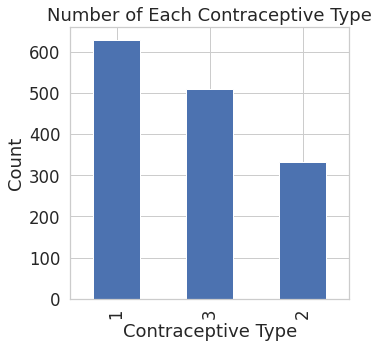

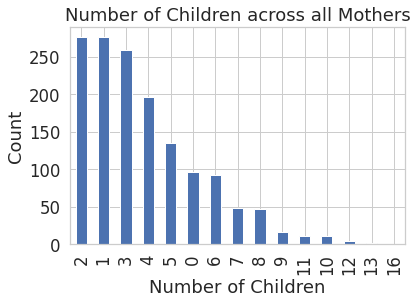

In [ ]:
#Starting Visuals: Barplot (Razi)
# Counts of type of contraeptive and number of children

prime_contraceptive_set_copy = prime_contraceptive_set.copy()
plt.figure(figsize=(5, 5))
prime_contraceptive_set_copy['contraceptive'].value_counts().plot(kind='bar');
plt.title('Number of Each Contraceptive Type')
plt.xlabel("Contraceptive Type")
plt.ylabel("Count")
plt.show()
prime_contraceptive_set_copy['num_child'].value_counts().plot(kind='bar');
plt.title("Number of Children across all Mothers")
plt.xlabel("Number of Children")
plt.ylabel("Count")
plt.show()

Text(0, 0.5, 'Number of Mothers')

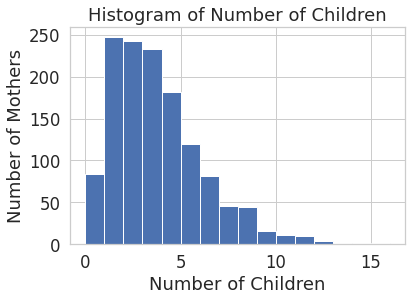

In [ ]:
#Num Child barplot (Razi)
#training_copy['num_child'].value_counts().plot(kind='bar');
num_child = training_copy['num_child']
plt.hist(num_child, bins = np.arange(17))
plt.title('Histogram of Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Number of Mothers')

Text(0.5, 1.0, 'Correlation Map between Features')

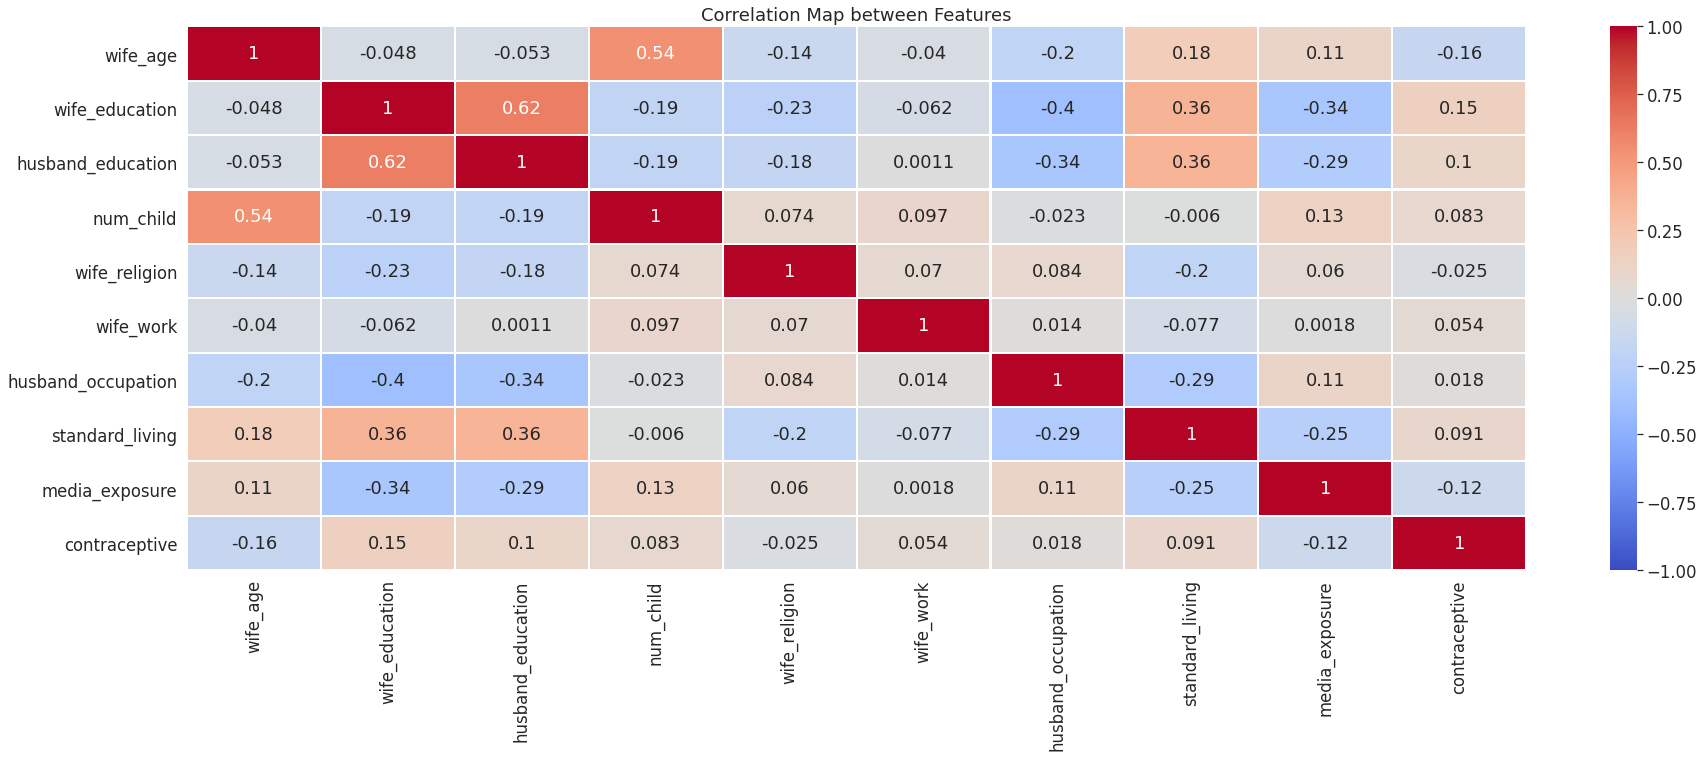

In [ ]:
#HeatMap/Correlation Plot visuals (Razi)

prime_contraceptive_set_copy.fillna(0)

plt.figure(figsize=(30,10))
sns.heatmap(prime_contraceptive_set_copy.corr(), vmin = -1, vmax = 1, annot = True, linewidth = 1.1, cmap='coolwarm')
plt.title("Correlation Map between Features")

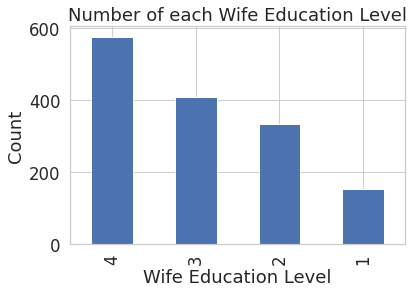

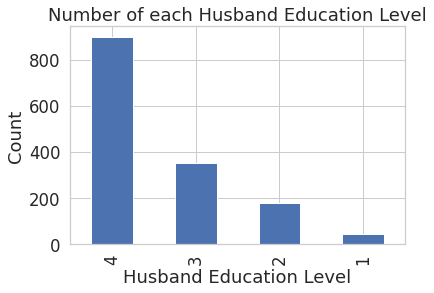

In [ ]:
# Contraceptives and number of children after grouping on wife's educaiton
#print("Value Counts of Wife Education")
prime_contraceptive_set_copy['wife_education'].value_counts().plot(kind='bar')
plt.xlabel('Wife Education Level')
plt.ylabel('Count')
plt.title('Number of each Wife Education Level')
plt.show()
prime_contraceptive_set_copy['husband_education'].value_counts().plot(kind='bar')
plt.xlabel('Husband Education Level')
plt.ylabel('Count')
plt.title('Number of each Husband Education Level')
plt.show()

We first wanted to see what the education level distrubtion was like.  We are dealing with a generally more educated population.  The men seem to be slightly more educated than the women.

Text(0.5, 1.0, "Number of Each Wife's Education Level by Contraceptive Type")

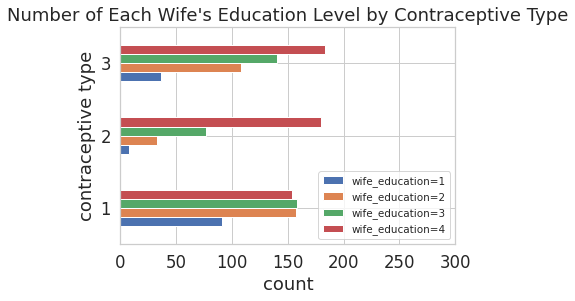

In [ ]:
w = training.groupby('contraceptive').agg(np.sum)[['wife_education=1','wife_education=2','wife_education=3','wife_education=4']]
w.plot(kind='barh')
plt.xlim([0,300])
plt.legend(fontsize='xx-small')
plt.xlabel('count')
plt.ylabel('contraceptive type')
plt.title("Number of Each Wife's Education Level by Contraceptive Type")

Next we look at how education level relates to contraceptive.  For women, long term contraceptive is dominated by the highest education bracket.  Short term contraceptive is also led by the highest education bracket but has more from the middle two levels.  The no contraceptive group is also led by higher educaiton levels.  But it should be kept in mind that there are overall way more women with higher education so this is not too suprising.

Text(0.5, 1.0, "Number of each Husband's Education Level by Contraceptive Type")

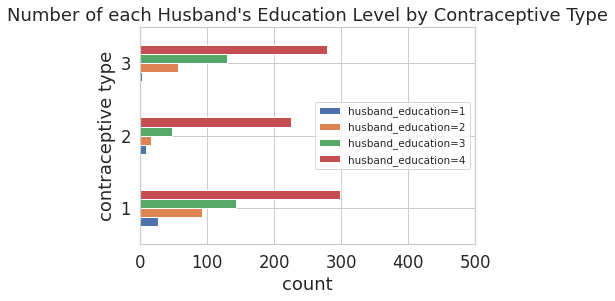

In [ ]:
m = training.groupby('contraceptive').agg(np.sum)[['husband_education=1','husband_education=2','husband_education=3','husband_education=4']]
m.plot(kind='barh')
plt.xlim([0,500])
plt.legend(fontsize='xx-small')
plt.xlabel('count')
plt.ylabel('contraceptive type')
plt.title("Number of each Husband's Education Level by Contraceptive Type")

Similar story with the men except the highest education bracket dominates all contraceptive groups more heavily.  Again this is due to the high number of educated men and lack of uneducated men.

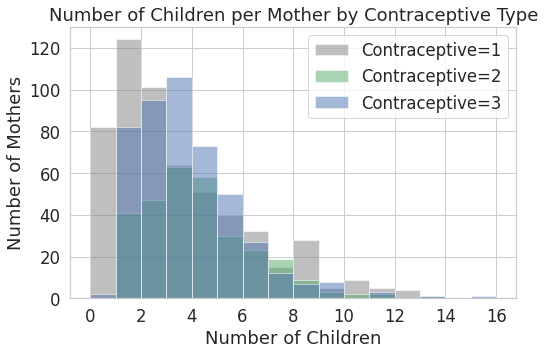

In [ ]:
#Type of contraceptive histogram
plt.figure(figsize=(8, 5))
plt.hist(contra_1_df['num_child'], bins = np.arange(17), ec='w', alpha = 0.5, color='gray')
plt.hist(contra_2_df['num_child'], bins = np.arange(17), ec='w', alpha = 0.5, color='g')
plt.hist(contra_3_df['num_child'], bins = np.arange(17), ec='w', alpha = 0.5, color='b')
plt.xlabel('Number of Children')
plt.ylabel('Number of Mothers')
plt.title('Number of Children per Mother by Contraceptive Type')
plt.legend(['Contraceptive=1', 'Contraceptive=2', 'Contraceptive=3'])

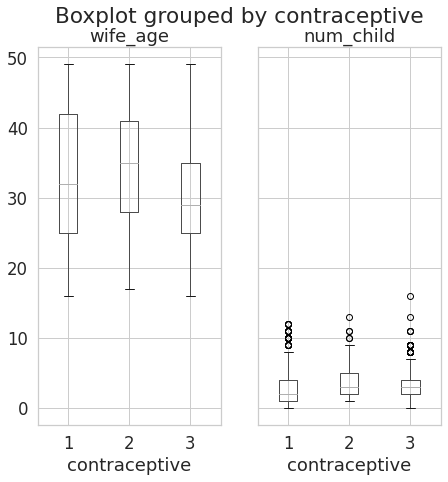

In [ ]:
boxplot = one_hot_encoded_contraceptive_data.boxplot(column=['wife_age', 'num_child'], 
                                                     by = 'contraceptive', figsize = (7, 7))

In [ ]:
prime_contraceptive_set.pivot_table(index='contraceptive', columns='standard_living', aggfunc='size')

standard_living,1,2,3,4
contraceptive,,,,
1,80,117,184,248
2,9,30,90,204
3,40,82,157,232


With this pivot table, we can see the joint distribution of standard_living and contraceptive method used. We observe that for each standard_living, the majority use no contraceptive, then long-term, then short-term contraceptive method. However, for standard_living=4, it is much more evenly distributed. In general, as standard_living increases, the proportion of women using no contraceptive decreases (62% -> 51% -> 43% -> 36%)

In [ ]:
prime_contraceptive_set.pivot_table(index='contraceptive', columns='wife_religion', aggfunc='size')

wife_religion,0,1
contraceptive,,
1,75,554
2,76,257
3,69,442


The distribution of contraceptive methods for non-Islam women is fairly uniform (~33% for each group) whilst 44% of Islam women do not take contraceptives. These numbers are less polarizing than expected.

In [ ]:
prime_contraceptive_set.pivot_table(index='contraceptive', columns='media_exposure', aggfunc='size')

media_exposure,0,1
contraceptive,,
1,555,74
2,323,10
3,486,25


68% of women without good media exposure do not take contraceptives compared to 41% of women with good media exposure.

In [ ]:
prime_contraceptive_set.pivot_table(index='contraceptive', columns='wife_work', aggfunc='size')

wife_work,0,1
contraceptive,,
1,170,459
2,89,244
3,110,401


The distribution of contraceptive method used is surprisingly similar for both working and nonworking women. Working women: 0.46, 0.24, 0.3 nonworking women: 0.42, 0.22, 0.36 for no, short-term, and long-term contraceptives respectively.

Confusion matrix, without normalization
[[40  0 29]
 [16  1 18]
 [12  0 32]]
Normalized confusion matrix
[[0.58 0.   0.42]
 [0.46 0.03 0.51]
 [0.27 0.   0.73]]


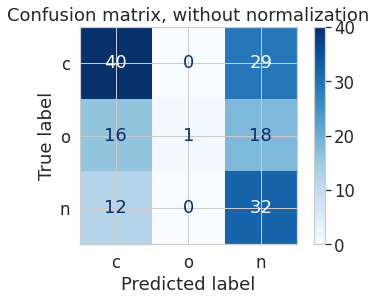

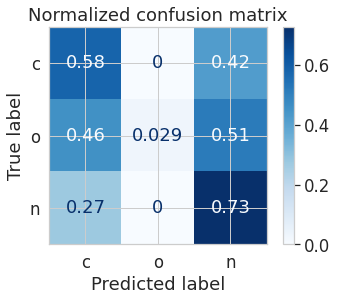

In [ ]:
#Precision/Recall on the new one-hot-encoded DF

#other_X = training_copy
#other_Y = prime_contraceptive_set_copy['contraceptive']

#other_model = LogisticRegression(max_iter=1000).fit(other_X, other_Y)
#other_lr_mean_accuracy_score = other_lr_model.score(other_X, other_Y)
#other_lr_mean_accuracy_score

#random_state = np.random.RandomState(0) #meant to add noise
#one_v_rest_classifier = OneVsRestClassifier(svm.LinearSVC(random_state = random_state))
#one_v_rest_classifier.fit(x_train, y_train)
#y_score = one_v_rest_classifier.decision_function(x_test)
#precision_mean = average_precision_score(y_test, y_score)
#print('Mean precision/recall score: {0:0.2f}'.format(precision_mean))

svm_classifier = svm.SVC(kernel='linear', C=0.01).fit(x_train, y_train)
np.set_printoptions(precision=2)

class_names = 'contraceptive'

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svm_classifier, x_test, y_test,
                                 display_labels = class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.show()

In [ ]:
# Standardizing numerical values (wife_age, num_child)
std_prime_contraceptive_set = one_hot_encoded_contraceptive_data.copy()
std_prime_contraceptive_set['wife_age'] = (std_prime_contraceptive_set['wife_age'] - std_prime_contraceptive_set['wife_age'].mean())/(std_prime_contraceptive_set['wife_age'].max() - std_prime_contraceptive_set['wife_age'].min())
std_prime_contraceptive_set['num_child'] = (std_prime_contraceptive_set['num_child'] - std_prime_contraceptive_set['num_child'].mean())/(std_prime_contraceptive_set['num_child'].max() - std_prime_contraceptive_set['num_child'].min())

training, testing = train_test_split(std_prime_contraceptive_set, test_size=0.1, random_state=42) 
y_train = training['contraceptive']
y_test = testing['contraceptive']
x_train = training.drop(['contraceptive'], axis = 1)
x_test = testing.drop(['contraceptive'], axis = 1)

contraceptive_array = np.array(training['contraceptive']) #this is basically y_train
training_copy = training.copy()


In [ ]:
# Cross validation of various models using increasing number of features
models = {}
features = ['wife_age', 'num_child', 'wife_education=1', 'wife_education=2', 'wife_education=3', 'wife_education=4', 'husband_education=1',
 'husband_education=2', 'husband_education=3', 'husband_education=4', 'wife_religion=0', 'wife_religion=1', 'wife_work=0', 'wife_work=1',
 'husband_occupation=1', 'husband_occupation=2', 'husband_occupation=3', 'husband_occupation=4', 'standard_living=1', 'standard_living=2',
 'standard_living=3', 'standard_living=4', 'media_exposure=0', 'media_exposure=1']
for i in range(len(features)):
    # Creating models using increasing number of features
    feat = features[:(i+1)]
    name = "+ " + features[i]
    # The pipeline for the ith model
    model = Pipeline([
        ("SelectColumns", ColumnTransformer([
            ("keep", "passthrough", feat),
        ])),
        ("LinearModel", LinearRegression())
    ])
    model.fit(x_train, contraceptive_array);
    models[name] = model
def rmse_score(model, X, y):
    return np.sqrt(np.mean((y - model.predict(X))**2))
def compare_models(models):
    # Training error for each model
    training_rmse = [rmse_score(model, x_train, contraceptive_array) for model in models.values()]
    # Cross validation error for each model
    validation_rmse = [np.mean(cross_val_score(model, x_train, contraceptive_array, scoring=rmse_score, cv=5)) 
                       for model in models.values()]
    scoring = [model.score(x_train, contraceptive_array) for model in models.values()]
    names = list(models.keys())
    fig = go.Figure([
        go.Bar(x = names, y = training_rmse, name="Training RMSE"),
        go.Bar(x = names, y = validation_rmse, name="CV RMSE", opacity=.3)])
    fig.update_yaxes(title="RMSE")
    fig.update_layout(title='Training and CV RMSE for potential Lin Reg models', 
                                       xaxis_title="Model with cumulative features up to [name]",
                                       yaxis_title="RMSE")
    fig['layout']['yaxis1'].update(range=[0.8, 0.88], autorange=False)
    return fig
compare_models(models)

There are some places where the training and/or CV RMSE increase, most notably at wife_education=4. We note that the RMSE ranges a very small interval of 0.82 to .865

In [ ]:
#Grouping the categorical variables together
new_models = {}
new_models['wife_age'] = models['+ wife_age']
new_models['+ child'] = models['+ num_child']
new_models['+ wife_educ'] = models['+ wife_education=4']
new_models['+ husband_educ'] = models['+ husband_education=4']
new_models['+ wife_relig'] = models['+ wife_religion=1']
new_models['+ wife_work'] = models['+ wife_work=1']
new_models['+ husband_occup'] = models['+ husband_occupation=4']
new_models['+ living'] = models['+ standard_living=4']
new_models['+ media'] = models['+ media_exposure=1']

compare_models(new_models)

The training RMSE is now strictly decreasing. However, we see that the CV RMSE (which serves as a surrogate for the testing set) increases when we add wife_education, wife_religion, and husband_occupation, albeit it is by a very small amount and goes back down by the last model.

In [ ]:
lin_reg_model = Pipeline([
        ("SelectColumns", ColumnTransformer([
            ("keep", "passthrough", features),
        ])),
        ("LinearModel", LinearRegression())
    ])
lin_reg_model.fit(x_train, contraceptive_array);
print(lin_reg_model.score(x_train, contraceptive_array))

0.12691048397979543


The R^2 coefficient is fairly low, though at least not negative. Additionally, R^2 does not say much about the quality of the model. Regardless, we want to move on to more suitable models other than the linear regression. Doing a linear regression as a starter provided good visualization as to the general trend of decreasing RMSE as we add more features. For more thorough feature selection, we can move on to more intricate methods.

In [ ]:
# Build Linear REgression Model and Cross Validation Linear Regression Model

X = training_copy.drop(['contraceptive'], axis = 1)  #training_copy[['wife_education', 'husband_education','wife_religion', 'wife_work', 'husband_occupation', 'standard_living',  'media_exposure']].to_numpy()
Y = contraceptive_array
lr_model = LogisticRegression(max_iter=1000).fit(x_train, contraceptive_array)
lr_model_accuracy_score = lr_model.score(x_train, contraceptive_array)

lr_cv_model = LogisticRegressionCV(Cs = 5, fit_intercept = True, cv = 5, max_iter = 1040, random_state = 40)
lr_cv_model.fit(x_train, contraceptive_array)
lr_cv_accuracy_score = lr_cv_model.score(x_train, contraceptive_array)



testing_copy = testing.copy()
Y_t = testing_copy['contraceptive']
X_t = testing_copy.drop(['contraceptive'], axis = 1)  #training_copy[['wife_education', 'husband_education','wife_religion', 'wife_work', 'husband_occupation', 'standard_living',  'media_exposure']].to_numpy()
lr_model_testing = LogisticRegression(max_iter=1000).fit(x_test, y_test)

lr_model_accuracy_score_testing = lr_model_testing.score(x_test, y_test)

lr_cv_model_testing = LogisticRegressionCV(Cs = 5, fit_intercept = True, cv = 5, max_iter = 1040, random_state = 40)
lr_cv_model_testing.fit(x_test, y_test)
#lr_cv_model_t.predict(X_t)
lr_cv_accuracy_score_testing = lr_cv_model_testing.score(x_test, y_test)


print(lr_model_accuracy_score, lr_cv_accuracy_score)
print(lr_model_accuracy_score_testing, lr_cv_accuracy_score_testing)

0.52 0.52
0.5945945945945946 0.6351351351351351


In [ ]:
#Experiment with Cross-Validation: (this is mainly working with the training sets for now)
#               we're probably going to )have to one hot encode and transform the testing sets as well
#cr_v = KFold(n_splits=12, random_state=42) # this for getting a visualizer for all cross_valid_scores on ridge regression
#ridge_model = Ridge() 
#visualizer = cv_scores(ridge_model, x_train, y_train, cv=cv, scoring='r2')#prime_contraceptive_set
#new_models['LassoCV']['LinearModel']

def rmse(y, y_hat): return np.sqrt(np.mean((y - y_hat)**2))
def cross_validate_rmse(model):
    model = clone(model)
    five_fold = KFold(n_splits=5)
    rmse_values = []
    for tr_ind, va_ind in five_fold.split(x_train):
        model.fit(x_train.iloc[tr_ind,:], y_train.iloc[tr_ind])
        rmse_values.append(rmse(y_train.iloc[va_ind], model.predict(x_train.iloc[va_ind,:])))
    return np.mean(rmse_values)
    
lasso_model = linear_model.Lasso()
print("Lasso Model 5 Fold cross_valid_score:")
print(cross_val_score(lasso_model, x_train, y_train, cv=5))
print("LogisticRegression Model 5 Fold cross_valid_score: ") 
print(cross_val_score(lr_model, x_train, y_train, cv=5))
print("LogisticRegressionCV 5 Fold cross_valid_score: ") 
print(cross_val_score(lr_cv_model, x_train, y_train, cv=5))

print("LogisticRegression cross_validate_rmse value:") 
print(cross_validate_rmse(lr_model))
print("LogisticRegressionCV cross_validate_rmse value:") 
print(cross_validate_rmse(lr_cv_model)) 

Lasso Model 5 Fold cross_valid_score:
[-1.94e-04 -3.86e-04 -1.79e-02 -1.26e-02 -5.71e-05]
LogisticRegression Model 5 Fold cross_valid_score: 
[0.54 0.49 0.48 0.54 0.5 ]
LogisticRegressionCV 5 Fold cross_valid_score: 
[0.54 0.49 0.47 0.54 0.51]
LogisticRegression cross_validate_rmse value:
1.1199051098864703
LogisticRegressionCV cross_validate_rmse value:
1.1196323661861824


In [ ]:
# L1 (Lasso) Regularization
lasso_model = Pipeline([
    ("SelectColumns", ColumnTransformer([
        ("keep", StandardScaler(), features)
    ])),
    ("Imputation", SimpleImputer()),
    ("LinearModel", LassoCV(cv=3))
])
lasso_model.fit(X, Y)
# Keeping features with non-zero coefficients 
keep = ~np.isclose(lasso_model['LinearModel'].coef_, 0)
new_features = np.array(features)[keep].tolist()

In [ ]:
# Updating LRCV model to consider select features found by Lasso regularization

new_X = training[new_features]

new_lr_model = LogisticRegression(max_iter=1000).fit(new_X, Y)
new_lr_model_accuracy_score = new_lr_model.score(new_X, Y)

new_lr_cv_model = LogisticRegressionCV(Cs = 5, fit_intercept = True, cv = 5, max_iter = 1040, random_state = 40)
new_lr_cv_model.fit(new_X, Y)
new_lr_cv_accuracy_score = new_lr_cv_model.score(new_X, Y)

new_X_t = testing[new_features]

new_lr_model_t = LogisticRegression(max_iter=1000).fit(new_X_t, Y_t)
new_lr_model_accuracy_score_t = new_lr_model.score(new_X_t, Y_t)

new_lr_cv_model_t = LogisticRegressionCV(Cs = 5, fit_intercept = True, cv = 5, max_iter = 1040, random_state = 40)
new_lr_cv_model_t.fit(new_X_t, Y_t)
new_lr_cv_model_t.predict(new_X_t)
new_lr_cv_accuracy_score_t = new_lr_cv_model_t.score(new_X_t, Y_t)

print('LR Training accuracy before and after feature selection:', lr_model_accuracy_score,', ',new_lr_model_accuracy_score)
print('LR Testing accuracy before and after feature selection:', lr_model_accuracy_score_testing, ', ', new_lr_model_accuracy_score_t)

print('LRCV Training accuracy before and after feature selection:', lr_cv_accuracy_score,', ',new_lr_cv_accuracy_score)
print('LRCV Testing accuracy before and after feature selection:', lr_cv_accuracy_score_testing, ', ', new_lr_cv_accuracy_score_t)

LR Training accuracy before and after feature selection: 0.52 ,  0.5184905660377358
LR Testing accuracy before and after feature selection: 0.5945945945945946 ,  0.5405405405405406
LRCV Training accuracy before and after feature selection: 0.52 ,  0.5184905660377358
LRCV Testing accuracy before and after feature selection: 0.6351351351351351 ,  0.6351351351351351


We see that for the LogisticRegression model, training accuracy decreased while testing accuracy increased. For the LogisticRegressionCV model, training accuracy decreased while testing accuracy remained the same. Ultimately, feature selection via lasso regularization did not make significant strides in improving the model. 

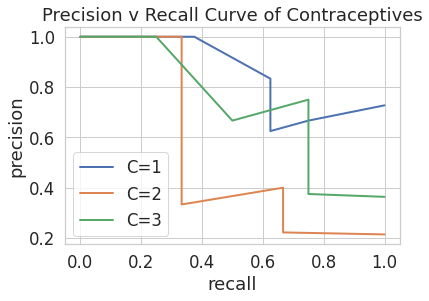

In [ ]:
#Precision-Recall Curve on 

binarized_contraceptive_labels = label_binarize(y_test, classes=[1, 2, 3]) #this is to help with the precision-recall curve 
x_train_pr, x_test_pr, y_train_pr, y_test_pr = train_test_split(x_test, 
                                            binarized_contraceptive_labels, test_size=0.1, random_state=42)

classifier_pr = OneVsRestClassifier(RandomForestClassifier(n_estimators = 22, random_state = 42))
classifier_pr.fit(x_train_pr, y_train_pr)
y_score_pr = classifier_pr.predict_proba(x_test_pr)

precision = dict()
recall = dict()

for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(y_test_pr[:, i], y_score_pr[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.title("Precision v Recall Curve of Contraceptives")
plt.legend(['C=1', 'C=2', 'C=3'])

plt.show()


In [ ]:
# Decision Tree Model
decision_tree_model = tree.DecisionTreeClassifier(random_state = 42, max_depth = 6)
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

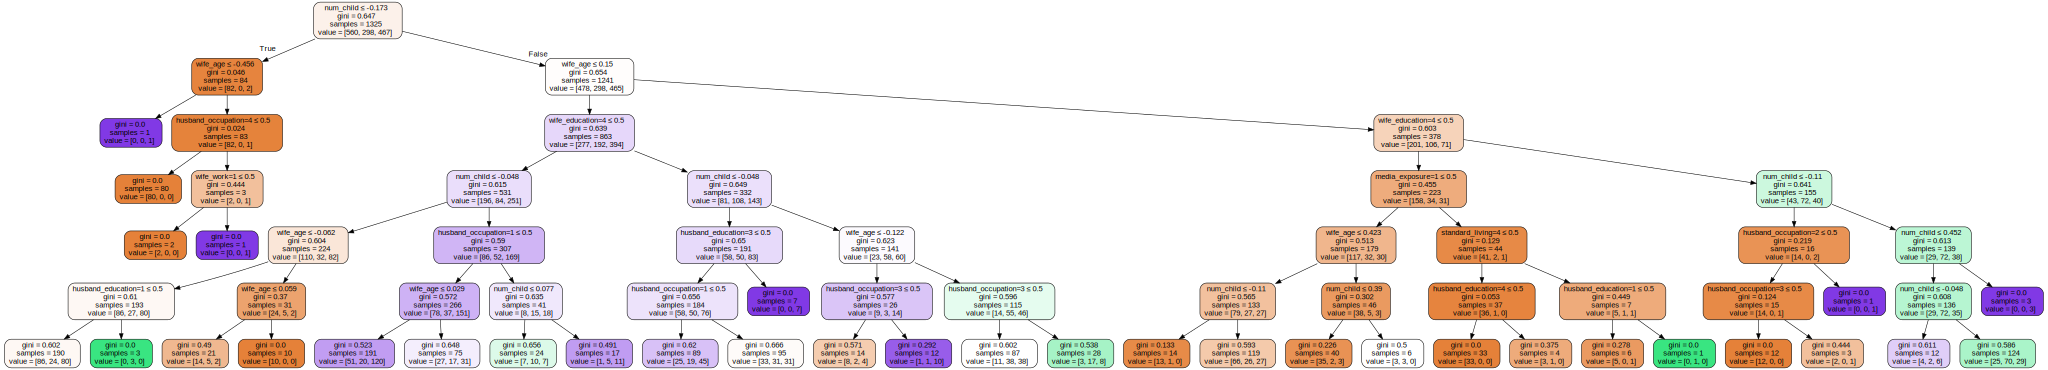

In [ ]:
#Visualize Decision Tree
import graphviz
dot_data = tree.export_graphviz(decision_tree_model, out_file=None, 
        feature_names=['wife_age', 'num_child', 'wife_education=1', 'wife_education=2', 'wife_education=3', 'wife_education=4', 'husband_education=1', 'husband_education=2', 'husband_education=3', 'husband_education=4', 'wife_religion=0', 'wife_religion=1', 'wife_work=0', 'wife_work=1', 'husband_occupation=1', 'husband_occupation=2', 'husband_occupation=3', 'husband_occupation=4', 'standard_living=1', 'standard_living=2', 'standard_living=3', 'standard_living=4', 'media_exposure=0', 'media_exposure=1'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph

In [ ]:
# Decision Tree model accuracy
dt_training_accuracy = decision_tree_model.score(x_train, y_train)

dt_training_accuracy

0.5886792452830188

In [ ]:
# Cross Validation on Decision Tree
print("Decision Tree Model 5 Fold cross_valid_score:")
print(cross_val_score(decision_tree_model, x_train, y_train, cv=5))

Decision Tree Model 5 Fold cross_valid_score:
[0.55 0.55 0.56 0.51 0.52]


In [ ]:
# Build Random Forest Model
random_forest_model = ensemble.RandomForestClassifier(n_estimators = 22, random_state = 42)
random_forest_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=22,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
#Random Forest Accuracy
rf_train_accuracy = random_forest_model.score(x_train, y_train)
rf_train_accuracy

0.9524528301886792

In [ ]:
#Random Forest Cross Validation
print("Random Fores Model 5 Fold cross_valid_score:")
print(cross_val_score(random_forest_model, x_train, y_train, cv=5))

Random Fores Model 5 Fold cross_valid_score:
[0.51 0.49 0.46 0.49 0.51]


In [ ]:
#Hyper-parameter-tuning experiment on logistic-regression-models from the original training set:
# Warning: Very slow
hyper_lr_trainingacc_collection = []
hyper_lr_cv_trainingacc_collection = []

#hyper_lr_cross_valid_collection = []
#hyper_lr_cv_cross_valid_collection = []
#decisiontree_trainingacc_collection = []

for i in np.arange(2, 20):
    hyper_lr_model = LogisticRegression(C=i/1.0, max_iter=1000).fit(x_train, y_train)
    hyper_lr_cv_model = LogisticRegressionCV(Cs = i, fit_intercept = True, cv = i,
                                             max_iter = 1040, random_state = 40).fit(x_train, y_train)
    
    hyper_lr_trainingacc_collection.append(hyper_lr_model.score(x_train, y_train))
    hyper_lr_cv_trainingacc_collection.append(hyper_lr_cv_model.score(x_train, y_train))
    
    #hyper_lr_cross_valid_collection.append()

max_lr_acc = max(hyper_lr_trainingacc_collection)
max_lr_cv_acc = max(hyper_lr_cv_trainingacc_collection)
max_lr_acc_index = hyper_lr_trainingacc_collection.index(max_lr_acc) + 1
max_lr_cv_acc_index = hyper_lr_cv_trainingacc_collection.index(max_lr_cv_acc) + 1

hyper_lr_model = LogisticRegression(C=i/1.0, max_iter=1000).fit(x_train, y_train)
hyper_lr_cv_model = LogisticRegressionCV(Cs = max_lr_cv_acc_index, fit_intercept = True, cv = max_lr_cv_acc_index, max_iter = 1040, random_state = 40).fit(x_train, y_train)


print("New LogisticRegression Model Hyper-Parameter training_accuracy: ") 
hyper_lr_model_accuracy_score = hyper_lr_model.score(x_train, y_train)
print(hyper_lr_model_accuracy_score)

print("New LogisticRegressionCV Model Hyper-Parameter training_accuracy: ") 
hyper_lr_cv_model_accuracy_score = hyper_lr_cv_model.score(x_train, y_train)
print(hyper_lr_cv_model_accuracy_score)

#print("New LogisticRegression Model Hyper-Parameter cross_valid_score: ") 
#print(cross_val_score(hyper_lr_model, x_train, y_train, cv=max_lr_acc_index))
print("New LogisticRegressionCV Model Hyper-Parametercross_valid_score: ") 
print(cross_val_score(hyper_lr_cv_model, x_train, y_train, cv=max_lr_cv_acc_index))

New LogisticRegression Model Hyper-Parameter training_accuracy: 
0.5162264150943396
New LogisticRegressionCV Model Hyper-Parameter training_accuracy: 
0.52
New LogisticRegressionCV Model Hyper-Parametercross_valid_score: 
[0.55 0.49 0.48 0.48 0.53 0.46 0.53]


Text(0.5, 1.0, 'Scree Plot of the OHE Training Dataset')

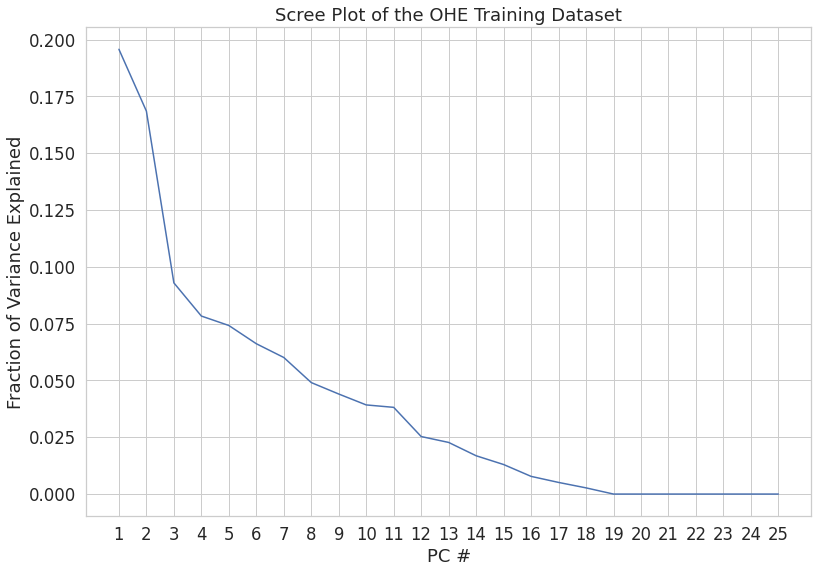

In [ ]:
#PCA Experiments
#this is working off the encoded training set
encoded_training_mean = np.mean(training, axis = 0)
encoded_training_centered = training - encoded_training_mean
#encoded_training_centered_scaled = encoded_training_centered / (np.std(encoded_training_centered))

u, s, enc_train_vt = np.linalg.svd(encoded_training_centered, full_matrices = False)
encoded_training_pcs = encoded_training_centered @ enc_train_vt.T
plt.figure(figsize=(13,9))
plt.plot(np.arange(1, 26), s**2 / sum(s**2));
plt.xticks(np.arange(1, 26), np.arange(1, 26));
plt.xlabel('PC #');
plt.ylabel('Fraction of Variance Explained');
plt.title('Scree Plot of the OHE Training Dataset')

Text(0.5, 1.0, 'Scree Plot of the OHE Original Dataset')

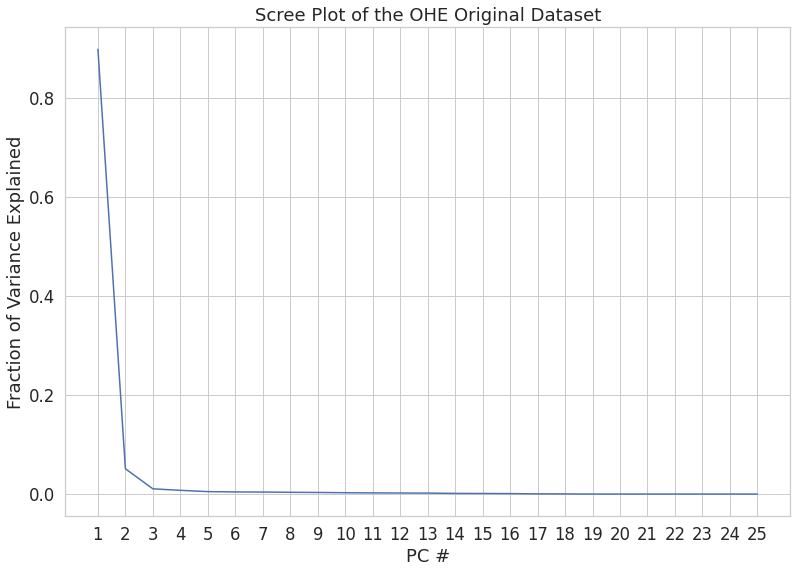

In [ ]:
#this is working off the overall encoded set before the train test split
encoded_prime_mean = np.mean(one_hot_encoded_contraceptive_data, axis = 0)
encoded_prime_centered = one_hot_encoded_contraceptive_data - encoded_prime_mean
#encoded_prime_centered_scaled = encoded_prime_centered / (np.std(encoded_prime_centered))


u, s, enc_prime_vt = np.linalg.svd(encoded_prime_centered, full_matrices = False)
encoded_prime_pcs = encoded_prime_centered @ enc_prime_vt.T
plt.figure(figsize=(13,9))
plt.plot(np.arange(1, 26), s**2 / sum(s**2));
plt.xticks(np.arange(1, 26), np.arange(1, 26));
plt.xlabel('PC #');
plt.ylabel('Fraction of Variance Explained');
plt.title('Scree Plot of the OHE Original Dataset')

Text(0.5, 1.0, 'Scree Plot of the Original Dataset')

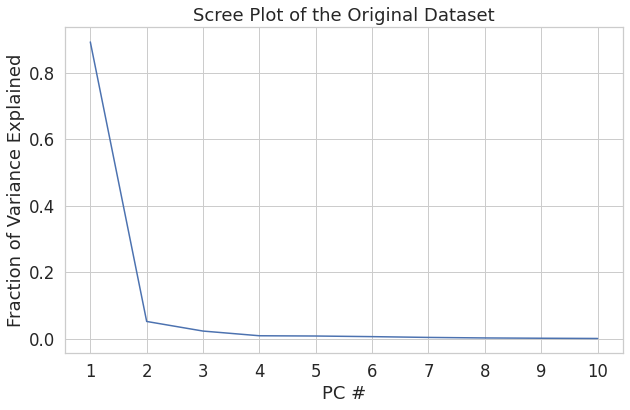

In [ ]:
#this is for working with the original plain excel file
prime_mean = np.mean(prime_contraceptive_set, axis = 0) 
prime_centered = prime_contraceptive_set - prime_mean
#encoded_prime_centered_scaled = encoded_prime_centered / (np.std(encoded_prime_centered))


u, s, prime_vt = np.linalg.svd(prime_centered, full_matrices = False)
prime_pcs = prime_centered @ prime_vt.T
plt.figure(figsize=(10,6))

plt.plot(np.arange(1, 11), s**2 / sum(s**2));
#plt.plot(np.arange(1, 11), vt**2 / sum(vt**2));
plt.xticks(np.arange(1, 11), np.arange(1, 11));
plt.xlabel('PC #');
plt.ylabel('Fraction of Variance Explained');
plt.title('Scree Plot of the Original Dataset')


Text(0.5, 1.0, 'Corellation between first 2 PCs on Original Datsset')

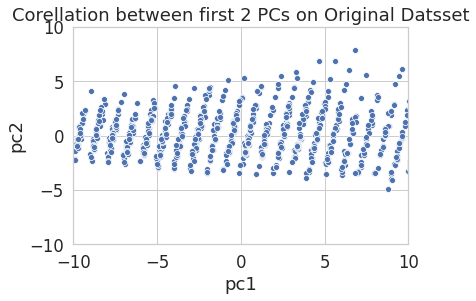

In [ ]:
#scatterplot experiment
prime_pcs = prime_pcs.rename(columns = {0: 'pc1', 1: 'pc2', 2: 'pc3'})
sns.scatterplot(data = prime_pcs, x = 'pc1', y = 'pc2')
plt.gca().set_xlim(-10, 10);
plt.gca().set_ylim(-10, 10);
plt.title('Corellation between first 2 PCs on Original Datsset')

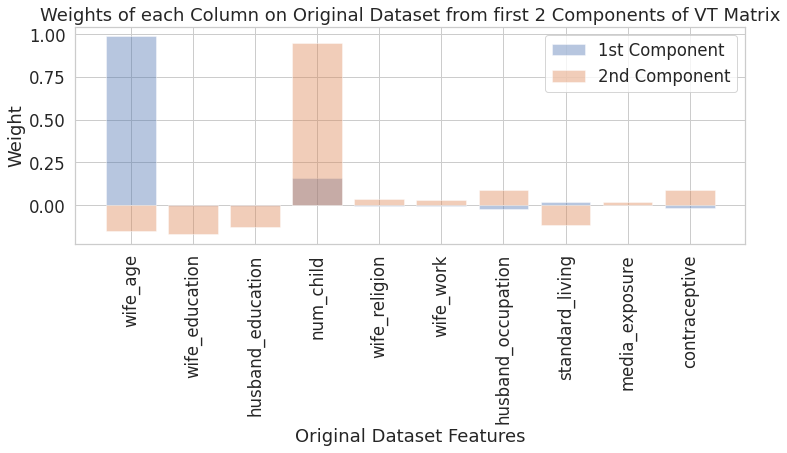

In [ ]:
#This is for displaying the weights from the original excel dataset on vt[0] and vt[1]
#num_prime_weights = vt.shape
prime_features = prime_centered.columns

def plot_pc(col_names, vt, k):
    plt.bar(col_names, vt[k, :], alpha=0.4)
    plt.xticks(col_names, rotation=90);

with plt.rc_context({"figure.figsize": (12, 4)}):
    plot_pc(prime_features, prime_vt, 0);
    plot_pc(prime_features, prime_vt, 1);
plt.xlabel('Original Dataset Features')
plt.ylabel('Weight')
plt.title('Weights of each Column on Original Dataset from first 2 Components of VT Matrix')
plt.legend(['1st Component', '2nd Component'])

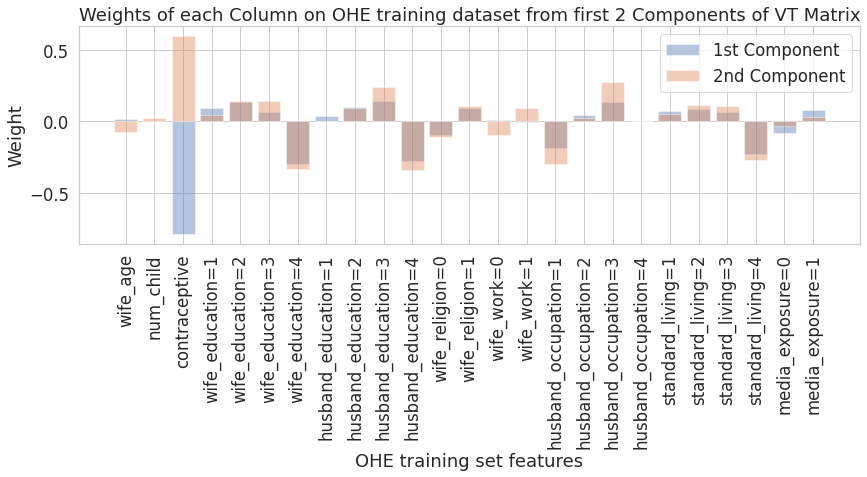

In [ ]:
encoded_training_features = encoded_training_centered.columns

def plot_pc(col_names, vt, k):
    plt.bar(col_names, vt[k, :], alpha=0.4)
    plt.xticks(col_names, rotation=90);

with plt.rc_context({"figure.figsize": (14, 4)}):
    plot_pc(encoded_training_features, enc_train_vt, 0); #blue
    plot_pc(encoded_training_features, enc_train_vt, 1);

plt.xlabel('OHE training set features')
plt.ylabel('Weight')
plt.title('Weights of each Column on OHE training dataset from first 2 Components of VT Matrix')
plt.legend(['1st Component', '2nd Component'])

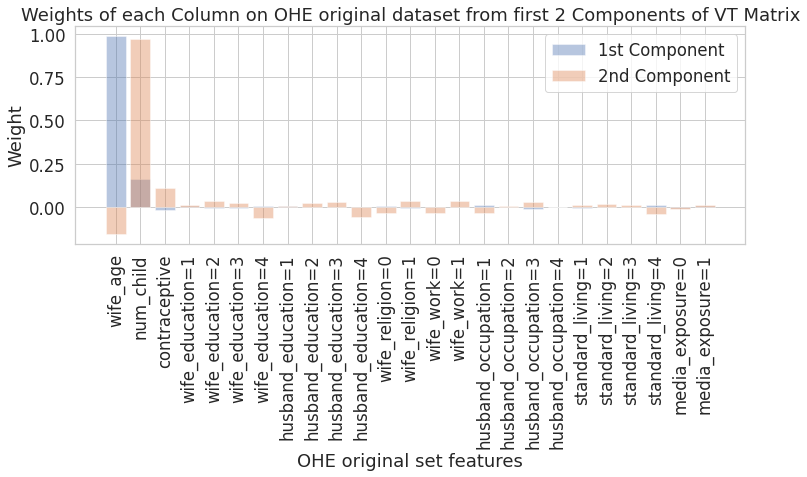

In [ ]:
encoded_prime_features = encoded_prime_centered.columns

def plot_pc(col_names, vt, k):
    plt.bar(col_names, vt[k, :], alpha=0.4)
    plt.xticks(col_names, rotation=90);

with plt.rc_context({"figure.figsize": (12, 4)}):
    plot_pc(encoded_prime_features, enc_prime_vt, 0);
    plot_pc(encoded_prime_features, enc_prime_vt, 1);
plt.xlabel('OHE original set features')
plt.ylabel('Weight')
plt.title('Weights of each Column on OHE original dataset from first 2 Components of VT Matrix')
plt.legend(['1st Component', '2nd Component'])

In [ ]:
#This is for testing the differences in cross-validation for our models based on the plots above and the correlations we've seen so far
#Check for differences in cross-validation on models based on plots above

new_PCA_features = ['wife_age', 'num_child', 'wife_education=2', 'wife_education=4', 'husband_education=3', 'husband_education=4', 
                    'wife_religion=0', 'wife_religion=1', 'wife_work=0', 'wife_work=1', 
                    'husband_occupation=1', 'husband_occupation=3', 'husband_occupation=4', 'standard_living=3','standard_living=4']

new_PCA_x_train_features = x_train[new_PCA_features]
new_PCA_lr_model = LogisticRegression(max_iter=1000).fit(new_PCA_x_train_features, contraceptive_array)
new_PCA_lr_cv_model = LogisticRegressionCV(Cs = 4, fit_intercept = True, cv = 5, max_iter = 1040, random_state = 40)
new_PCA_lr_cv_model.fit(new_PCA_x_train_features, contraceptive_array)

new_lasso_model = linear_model.Lasso()
print("New Lasso Model cross_valid_score:")
print(cross_val_score(new_lasso_model, new_PCA_x_train_features, y_train, cv=5))

print("New LogisticRegression Model cross_valid_score from PCA: ") 
print(cross_val_score(new_PCA_lr_model, new_PCA_x_train_features, y_train, cv=5))
print("New LogisticRegressionCV cross_valid_score from PCA: ") 
print(cross_val_score(new_PCA_lr_cv_model, new_PCA_x_train_features, y_train, cv=5))


print("New LogisticRegression Model training_accuracy from PCA: ") 
new_PCA_lr_model_accuracy_score = new_PCA_lr_model.score(new_PCA_x_train_features, contraceptive_array)
print(new_PCA_lr_model_accuracy_score)

print("New LogisticRegressionCV Model training_accuracy from PCA: ") 
new_PCA_lr_cv_model_accuracy_score = new_PCA_lr_cv_model.score(new_PCA_x_train_features, contraceptive_array)
print(new_PCA_lr_cv_model_accuracy_score)

New Lasso Model cross_valid_score:
[-1.94e-04 -3.86e-04 -1.79e-02 -1.26e-02 -5.71e-05]
New LogisticRegression Model cross_valid_score from PCA: 
[0.52 0.47 0.48 0.51 0.49]
New LogisticRegressionCV cross_valid_score from PCA: 
[0.52 0.46 0.48 0.51 0.49]
New LogisticRegression Model training_accuracy from PCA: 
0.5116981132075472
New LogisticRegressionCV Model training_accuracy from PCA: 
0.5132075471698113


In [ ]:
# Addig PCA stuff to random forests
rf = ensemble.RandomForestClassifier(n_estimators = 22, random_state = 42)
rf.fit(new_PCA_x_train_features, y_train)
rfa = rf.score(new_PCA_x_train_features, y_train)
rfta = rf.score(x_test[new_PCA_features], Y_t)
print('training accuracy')
print(rfa)
print('test accuracy')
print(rfta)


training accuracy
0.9509433962264151
test accuracy
0.527027027027027


This is our final model.  Random Forest with PCA features.